In [43]:
%matplotlib notebook

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [45]:
olympics_data = pd.read_csv('Resources/athlete_events.csv')
olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [46]:
olympics_data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [47]:
olympics_data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [48]:
olympics_data.dropna(subset=['Age', 'Weight'], inplace=True)
olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [49]:
olympics_data.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height      1214
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     176954
dtype: int64

0         24.0
1         23.0
4         21.0
5         21.0
6         25.0
          ... 
271111    29.0
271112    27.0
271113    27.0
271114    30.0
271115    34.0
Name: Age, Length: 207379, dtype: float64
0         80.0
1         60.0
4         82.0
5         82.0
6         82.0
          ... 
271111    89.0
271112    59.0
271113    59.0
271114    96.0
271115    96.0
Name: Weight, Length: 207379, dtype: float64


<IPython.core.display.Javascript object>


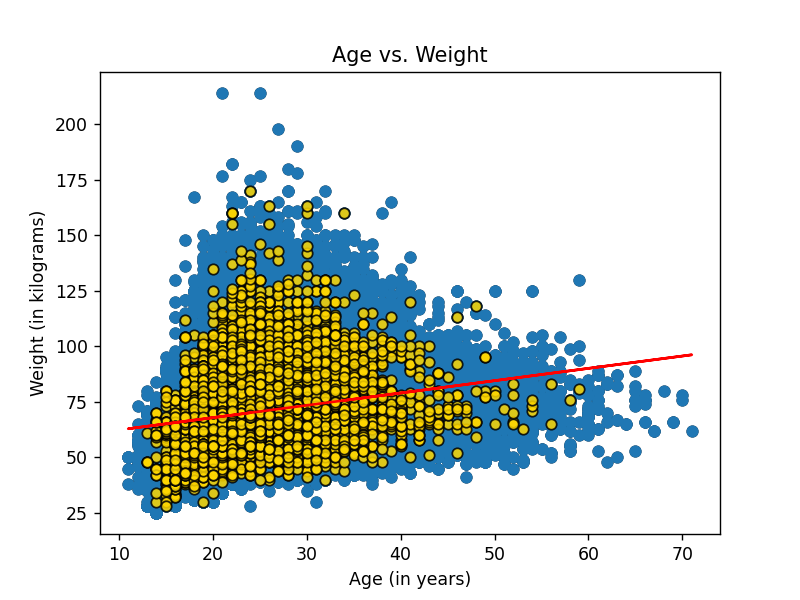

In [50]:
# Build scatter plot for Age vs. Weight

age_scatter = olympics_data['Age']
print(age_scatter)
weight_scatter = olympics_data['Weight']
print(weight_scatter)

plt.scatter(age_scatter, weight_scatter, marker="o", facecolors="green", edgecolors="black",
             alpha=0.85)

# Incorporate the other graph properties
plt.ylabel('Weight (in kilograms)')
plt.xlabel('Age (in years)')
plt.title("Age vs. Weight")
plt.savefig("Output/Fig1.png")

plt.show()

In [51]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(age_scatter, weight_scatter)
regress_values = age_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(age_scatter,weight_scatter)
plt.plot(age_scatter,regress_values,"r-")
plt.ylabel('Weight (in kilograms)')
plt.xlabel('Age (in years)')
plt.title("Age vs. Weight")
plt.savefig("Output/Fig1.png")
plt.show()

y = 0.55x + 56.81


In [52]:
#collect only Gold medals
gold_olympics_data = olympics_data.loc[(olympics_data["Medal"] == "Gold")]
gold_olympics_data.head(55)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold
76,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,Gold
78,20,Kjetil Andr Aamodt,M,34.0,176.0,85.0,Norway,NOR,2006 Winter,2006,Winter,Torino,Alpine Skiing,Alpine Skiing Men's Super G,Gold
172,72,Aleksey Aleksandrovich Abalmasov,M,28.0,180.0,83.0,Belarus,BLR,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold
173,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Gold
174,73,Luc Abalo,M,27.0,182.0,86.0,France,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball,Gold


In [53]:
# Build scatter plot for Age vs. Weight

age_scatter = gold_olympics_data['Age']
print(age_scatter)
weight_scatter = gold_olympics_data['Weight']
print(weight_scatter)

plt.scatter(age_scatter, weight_scatter, marker="o", facecolors="gold", edgecolors="black",
             alpha=0.85)

# Incorporate the other graph properties
plt.ylabel('Weight (in kilograms)')
plt.xlabel('Age (in years)')
plt.title("Age vs. Weight")
plt.savefig("Output/Fig4.png")

plt.show()

42        28.0
44        28.0
48        28.0
60        20.0
73        30.0
          ... 
270981    23.0
271009    28.0
271016    29.0
271049    31.0
271076    21.0
Name: Age, Length: 10248, dtype: float64
42        64.0
44        64.0
48        64.0
60        85.0
73        85.0
          ... 
270981    90.0
271009    60.0
271016    93.0
271049    93.0
271076    80.0
Name: Weight, Length: 10248, dtype: float64


In [15]:
olympics_data.dropna(subset=['Medal'], inplace=True)
olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


In [16]:
olympics_data.isnull().sum()

ID          0
Name        0
Sex         0
Age         0
Height    244
Weight      0
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
dtype: int64

In [32]:
# Count how many loss incidents occurred in each city
grouped_age = olympics_data.groupby(["Age"])
grouped_age.count()


,ID,Name,Sex,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Age,,,,,,,,,,,,,,
12.0,2,2,2,0,2,2,2,2,2,2,2,2,2,2
13.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10
14.0,53,53,53,53,53,53,53,53,53,53,53,53,53,53
15.0,155,155,155,155,155,155,155,155,155,155,155,155,155,155
16.0,284,284,284,284,284,284,284,284,284,284,284,284,284,284
17.0,400,400,400,399,400,400,400,400,400,400,400,400,400,400
18.0,646,646,646,644,646,646,646,646,646,646,646,646,646,646
19.0,1033,1033,1033,1025,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033
20.0,1562,1562,1562,1550,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562


In [40]:
age_by_medal = grouped_age["Medal"].count()

In [41]:
type(age_by_medal)

pandas.core.series.Series

In [42]:
x_medals = age_by_medal('Medal')

plt.xlabel("Age")
plt.ylabel("Medals")

plt.plot(x_medals, marker="o", color="red")
plt.show()


TypeError: 'Series' object is not callable